In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
le = pd.read_csv('DataSet.csv', sep=',')
le.dataframeName = 'DataSet.csv'
le.head()

,Variable,row,age,sex,b1,b2,b3,b4,b5,b6,...,m55,m56,maharat,roshd,khodpeiravi,ertebatm,rezayat,manaviat,shadi,behzisti
0,NaN,1,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,5.0,168.0,15.0,28.0,16.0,42.0,22.0,48.0,170.0
1,NaN,2,NaN,1.0,3.0,1.0,2.0,1.0,2.0,1.0,...,5.0,5.0,170.0,18.0,26.0,17.0,43.0,21.0,47.0,171.0
2,NaN,3,NaN,1.0,3.0,4.0,4.0,1.0,1.0,1.0,...,1.0,1.0,135.0,15.0,31.0,18.0,34.0,27.0,42.0,171.0
3,NaN,4,NaN,1.0,2.0,5.0,2.0,2.0,2.0,2.0,...,1.0,1.0,155.0,24.0,29.0,20.0,45.0,25.0,53.0,193.0
4,NaN,5,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,152.0,24.0,25.0,12.0,40.0,22.0,38.0,159.0


## DATA PREPROCESSING
### -Data Cleaning:


In [154]:
# Modify the original names of the features using a standard format for all the features.
orig_cols = list(le.columns) 
new_cols = [] 
for col in orig_cols:     
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower()) 

le.columns = new_cols

# Compute a summary of statistics only for the numerical features.
le.describe()

,variable,row,age,sex,b1,b2,b3,b4,b5,b6,...,m55,m56,maharat,roshd,khodpeiravi,ertebatm,rezayat,manaviat,shadi,behzisti
count,0.0,180.000000,0.0,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,...,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,NaN,90.500000,NaN,1.50000,2.437500,2.487500,1.806250,1.893750,1.962500,1.850000,...,2.10625,3.593750,153.768750,20.218750,27.412500,18.550000,43.856250,26.400000,48.443750,186.037500
std,NaN,52.105662,NaN,0.50157,1.050232,1.263854,0.865094,1.073388,0.924084,1.023006,...,1.34864,1.361173,18.631893,3.834094,4.331234,4.938362,9.710169,5.695855,7.819301,29.319512
min,NaN,1.000000,NaN,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,107.000000,8.000000,15.000000,8.000000,22.000000,12.000000,25.000000,103.000000
25%,NaN,45.750000,NaN,1.00000,1.750000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,2.000000,142.000000,18.000000,25.000000,15.000000,38.000000,22.000000,43.000000,168.750000
50%,NaN,90.500000,NaN,1.50000,3.000000,2.500000,2.000000,2.000000,2.000000,2.000000,...,2.00000,4.000000,152.500000,20.000000,28.000000,18.000000,43.000000,26.000000,48.500000,187.000000
75%,NaN,135.250000,NaN,2.00000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,...,3.00000,5.000000,165.250000,23.000000,30.000000,21.000000,50.000000,31.000000,54.000000,206.000000
max,NaN,180.000000,NaN,2.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.00000,5.000000,208.000000,29.000000,37.000000,34.000000,80.000000,40.000000,71.000000,272.000000


In [155]:
# Discard the metadata (age and variable and row).
le = le.drop(['age', 'variable', 'row'], axis=1)

In [156]:
le.head()

,sex,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,m55,m56,maharat,roshd,khodpeiravi,ertebatm,rezayat,manaviat,shadi,behzisti
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,5.0,168.0,15.0,28.0,16.0,42.0,22.0,48.0,170.0
1,1.0,3.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,...,5.0,5.0,170.0,18.0,26.0,17.0,43.0,21.0,47.0,171.0
2,1.0,3.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,135.0,15.0,31.0,18.0,34.0,27.0,42.0,171.0
3,1.0,2.0,5.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,...,1.0,1.0,155.0,24.0,29.0,20.0,45.0,25.0,53.0,193.0
4,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,152.0,24.0,25.0,12.0,40.0,22.0,38.0,159.0


In [157]:
# For each feature count all rows with NULL values.
le.isnull().sum()

sex         20
b1          20
b2          20
b3          20
b4          20
            ..
ertebatm    20
rezayat     20
manaviat    20
shadi       20
behzisti    20
Length: 142, dtype: int64

In [158]:
# For each feature delete all rows with NULL values.
le.dropna(inplace=True)
le.isnull().sum()

sex         0
b1          0
b2          0
b3          0
b4          0
           ..
ertebatm    0
rezayat     0
manaviat    0
shadi       0
behzisti    0
Length: 142, dtype: int64

In [159]:
#Change column order to better perform splits
new_order = [134,135,136,137,138,139,140,141]
le = le[le.columns[new_order]]
le.head()

,maharat,roshd,khodpeiravi,ertebatm,rezayat,manaviat,shadi,behzisti
0,168.0,15.0,28.0,16.0,42.0,22.0,48.0,170.0
1,170.0,18.0,26.0,17.0,43.0,21.0,47.0,171.0
2,135.0,15.0,31.0,18.0,34.0,27.0,42.0,171.0
3,155.0,24.0,29.0,20.0,45.0,25.0,53.0,193.0
4,152.0,24.0,25.0,12.0,40.0,22.0,38.0,159.0


## - Data Exploration

In [160]:
# Get a concise summary of the dataset.
le.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   maharat      160 non-null    float64
 1   roshd        160 non-null    float64
 2   khodpeiravi  160 non-null    float64
 3   ertebatm     160 non-null    float64
 4   rezayat      160 non-null    float64
 5   manaviat     160 non-null    float64
 6   shadi        160 non-null    float64
 7   behzisti     160 non-null    float64
dtypes: float64(8)
memory usage: 11.2 KB


#### Box Plots

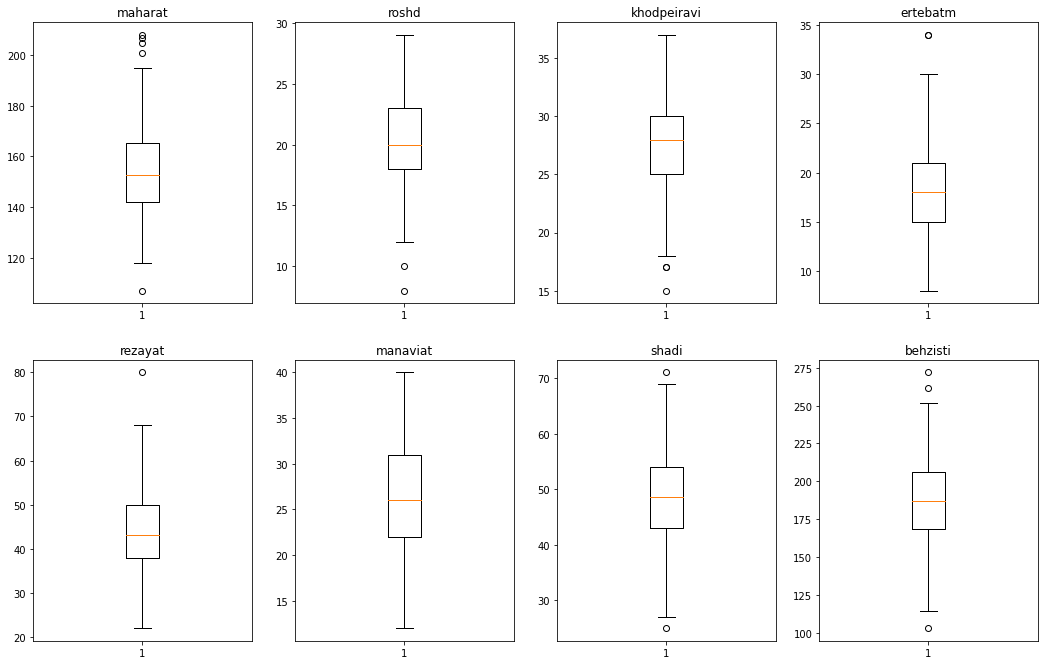

(160, 8)

In [161]:
# Create a dictionary of columns representing the features of the dataset.
col_dict = {'maharat':1,'roshd':2,'khodpeiravi':3,'ertebatm':4,'rezayat':5,'manaviat':6,'shadi':7,'behzisti':8}

# Visualize the data for each feature using box plots.
plt.figure(figsize=(18,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(le[variable],whis=1.5)
                     plt.title(variable)

plt.show()
le.shape

In [162]:
# Remove the outliers using the interquartile range (IQR).
Q1 = le.quantile(0.25)
Q3 = le.quantile(0.75)
IQR = Q3 - Q1

le = le[~((le < (Q1 - 1.5 * IQR)) |(le > (Q3 + 1.5 * IQR))).any(axis=1)]


# Print the dimensions of the cleaned dataset.
le.shape

(148, 8)

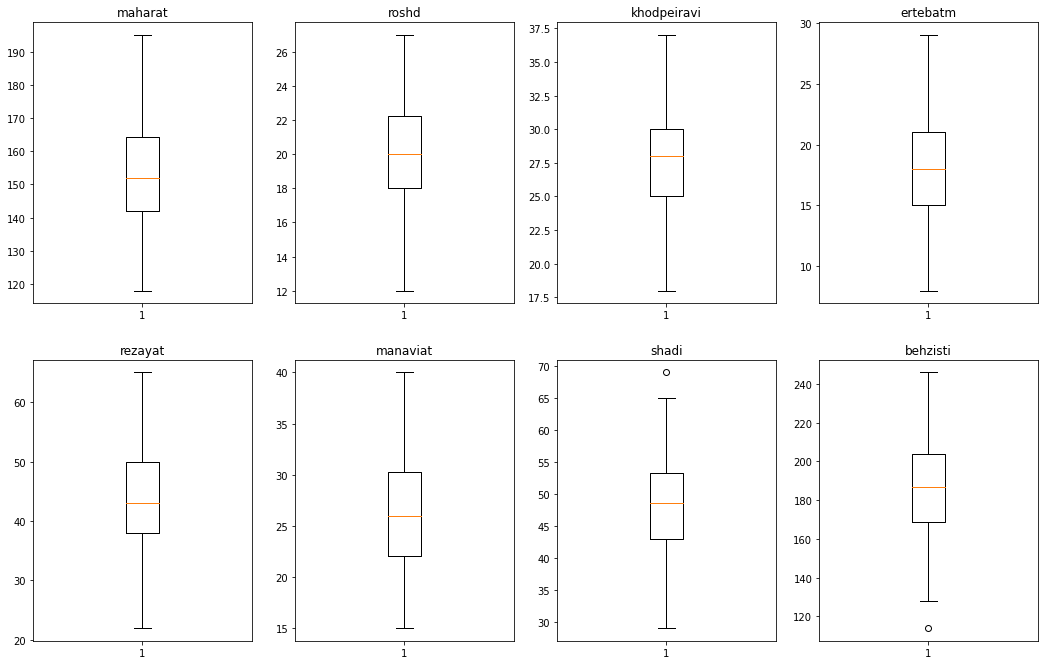

In [163]:
# Visualize the cleaned data for each feature using box plots.
plt.figure(figsize=(18,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(le[variable],whis=1.5)
                     plt.title(variable)
plt.show()

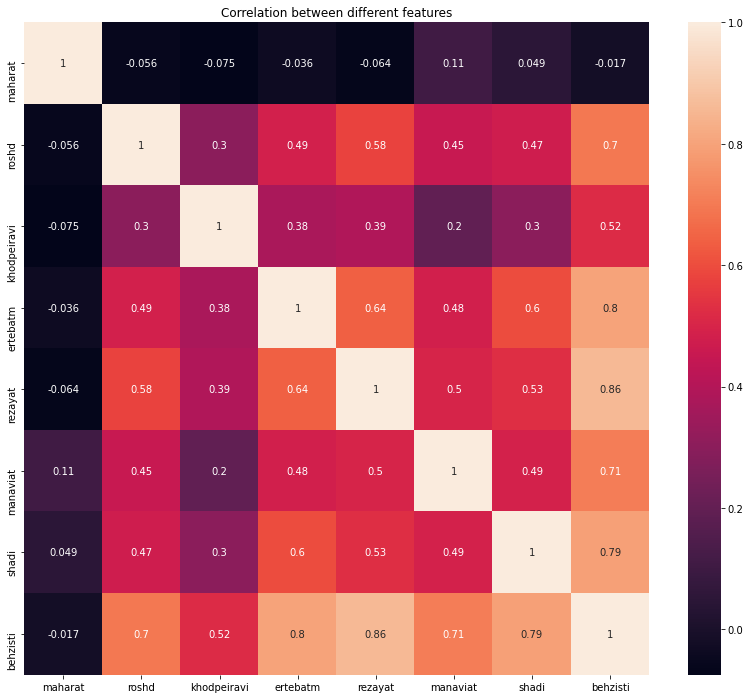

In [164]:
# Plot heatmap to visualize the correlations.
plt.figure(figsize = (14, 12))
sns.heatmap(le.corr(), annot = True)
plt.title('Correlation between different features');

### Scatter Plots

In [168]:
# # Create a vector containing all the features of the dataset.
# all_col = ['adult_mortality','infant_deaths','alcohol','percentage_expenditure','hepatitis_b','measles','bmi',
#          'under-five_deaths','polio','total_expenditure','diphtheria','hiv/aids','gdp','population','thinness_1-19_years',
#          'thinness_5-9_years','income_composition_of_resources','schooling']

# plt.figure(figsize=(15,30))

# # Plot each feature in function of the target variable (life_expectancy) using scatter plots.
# for i in range(len(all_col)):
#     plt.subplot(7,3,i+1)
#     plt.scatter(le[all_col[i]], le['life_expectancy'])
#     plt.xlabel(all_col[i])
#     plt.ylabel('Life Expectancy')

# plt.show()

## - Features Extraction

## PCA

In [ ]:
# inja ham hamona ro mizarim...